# Relationship between dataset size and model performance

## Configuration and imports

In [1]:
# basic configuration, put these lines at the top of each notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning

In [4]:
plt.rcParams["figure.figsize"] = (16, 9)
pd.options.display.max_columns = None
pd.set_option("display.precision", 2)
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## Load data

In [5]:
data = pd.read_csv('../data/credit_card_transactions.csv')
print(data.shape)
data.head()

(589099, 193)


,isFraud,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card1_2803,card1_6019,card1_7585,card1_7919,card1_9500,card1_12544,card1_12695,card1_15066,card1_15885,card1_17188,card1_0,card2_111.0,card2_170.0,card2_194.0,card2_321.0,card2_360.0,card2_490.0,card2_514.0,card2_545.0,card2_555.0,card2_583.0,card2_0.0,card3_102.0,card3_106.0,card3_117.0,card3_119.0,card3_143.0,card3_144.0,card3_146.0,card3_147.0,card3_150.0,card3_185.0,card3_0.0,card4_american express,card4_discover,card4_mastercard,card4_visa,card4_other,card5_102.0,card5_117.0,card5_126.0,card5_137.0,card5_138.0,card5_166.0,card5_195.0,card5_219.0,card5_224.0,card5_226.0,card5_0.0,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_other,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0.40,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.14,0.0,0.09,0.1,0.42,0.0,0.10,0.00,0.0,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.40,0.00,0.0,0.00,0.00,0.00,0.40,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.40,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.40,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.31,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.00,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.38,0.08,0.08,0.0,0.0,0.0,0.09,0.0,0.00,0.13,0.00,0.09,0.0,0.09,0.1,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.2,0.16,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.37,0.13,0.21,0.0,0.0,0.0,0.21,0.0,0.00,0.13,0.00,0.09,0.0,0.41,0.1,0.73,0.1,0.54,0.49,0.0,0.53,0.48,0.1,0.51,0.47,0.0,0.0,0.0,1.0,0.33,0.33,0.33,0.3,0.3,0.3,0.36,0.36,0.36,0.5,0.5,0.5,0.5,0.5,0.5,0.26,0.26,0.26,0.33,0.62,0.57,0.0,0.54,0.45,0.34,0.61,0.58,0.0,0.0,0.0,0.1,0.49,0.0,0.0,0.00,0.0,0.53,0.0,0.46,0.0,0.0,0.0,0.0,0.0,0.1,0.51,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.34,0.63,0.59,0.0,0.54,0.0,0.45,0.0,0.0,0.0,0.34,0.61,0.58,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
print(data.isFraud.value_counts())
print(data.isFraud.value_counts(normalize=True))

0    568496
1     20603
Name: isFraud, dtype: int64
0    0.97
1    0.03
Name: isFraud, dtype: float64


## Prepare datasets

### Create validation set

In [11]:
data_train, data_valid = train_test_split(data, test_size=10000, random_state=47)
print(data_train.shape)
print(data_valid.shape)

(579099, 193)
(10000, 193)


In [12]:
print(data_train.isFraud.value_counts())
print(data_train.isFraud.value_counts(normalize=True))

0    558860
1     20239
Name: isFraud, dtype: int64
0    0.97
1    0.03
Name: isFraud, dtype: float64


In [13]:
print(data_valid.isFraud.value_counts())
print(data_valid.isFraud.value_counts(normalize=True))

0    9636
1     364
Name: isFraud, dtype: int64
0    0.96
1    0.04
Name: isFraud, dtype: float64


### Balance training dataset

In [14]:
fraud = data_train[data_train.isFraud == 1]
valid = data_train[data_train.isFraud == 0]

In [15]:
valid = resample(valid, replace=False, n_samples=len(fraud)*4, random_state=47)
data_train = pd.concat([fraud, valid])

In [16]:
print(data_train.isFraud.value_counts())
print(data_train.isFraud.value_counts(normalize=True))

0    80956
1    20239
Name: isFraud, dtype: int64
0    0.8
1    0.2
Name: isFraud, dtype: float64


### Separate features and target variable

In [17]:
def split_data(df, dep_var):
    return df.drop(columns=[dep_var]), df[dep_var]

In [18]:
X_train, y_train = split_data(data_train, 'isFraud')
X_valid, y_valid = split_data(data_valid, 'isFraud')

## Create helper functions

In [19]:
def eval_model(model, X, y):
    pred = model.predict_proba(X)
    if pred.shape[1] == 1:
        pred = np.hstack((pred, np.expand_dims(np.zeros(len(pred)), -1)))
    return roc_auc_score(y, pred[:, 1])

In [20]:
def sample_size_experiment(model, X_train, y_train, X_valid, y_valid, sample_sizes, rounds=10):
    results = []
    for n in sample_sizes:
        scores = []
        for _ in range(rounds):
            X_sample = X_train.sample(n=n)
            y_sample = y_train[X_sample.index]
            model.fit(X_sample, y_sample)
            score = eval_model(model, X_valid, y_valid)
            scores.append(score)
        results.append({'classifier': type(model).__name__, 'sample_size': n, 'auc_mean': np.mean(scores), 'auc_std': np.std(scores)})
        print(f"completed {rounds} rounds with {n} training examples")
    return pd.DataFrame(data=results)

# Single Experiments

In [21]:
SAMPLE_SIZES = [100, 1000, 10000, 100000]

## 1. Logistic regression

In [26]:
lr = LogisticRegression()

In [27]:
results_lr = sample_size_experiment(lr, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

completed 10 rounds with 100 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 100000 training examples


## 2. Decision Tree

In [65]:
dt = DecisionTreeClassifier()

In [66]:
results_dt = sample_size_experiment(dt, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

completed 10 rounds with 100 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 100000 training examples


## 3. Random forest

In [31]:
rf = RandomForestClassifier()

In [32]:
%time rf.fit(X_train, y_train)

CPU times: user 26.3 s, sys: 400 ms, total: 26.7 s
Wall time: 27 s


RandomForestClassifier()

In [33]:
eval_model(rf, X_valid, y_valid)

0.9028844987046402

In [34]:
results_rf = sample_size_experiment(rf, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

completed 10 rounds with 100 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 100000 training examples


## Visualizations
### 1. Logistic Regression

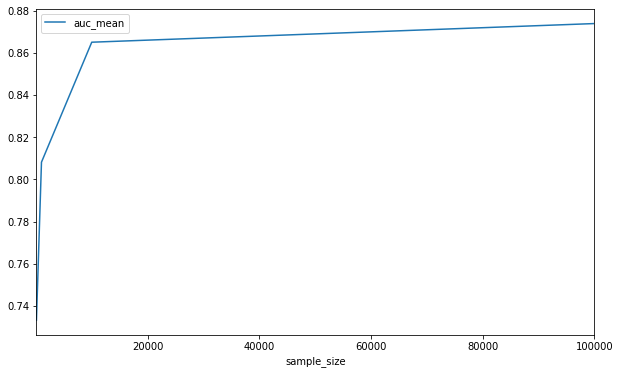

In [58]:
ax = results_lr.plot(x='sample_size', y='auc_mean')

### 2. Decision Tree

<AxesSubplot:xlabel='sample_size'>

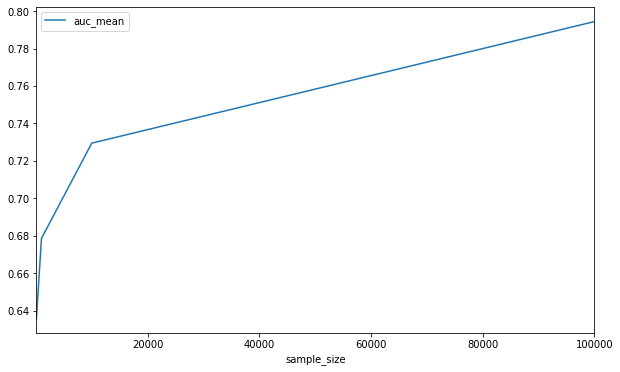

In [67]:
results_dt.plot(x='sample_size', y='auc_mean')

### 3. Random Forest

<AxesSubplot:xlabel='sample_size'>

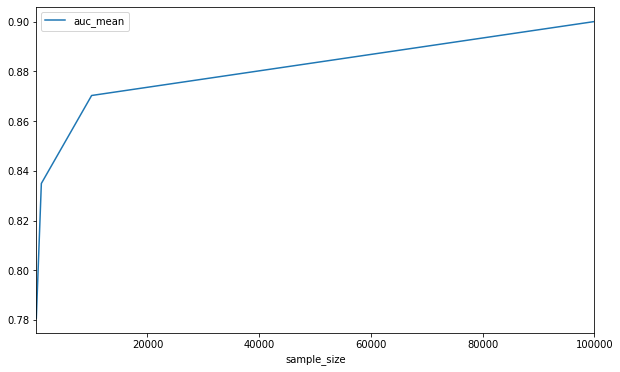

In [59]:
results_rf.plot(x='sample_size', y='auc_mean')

### All Algorithms

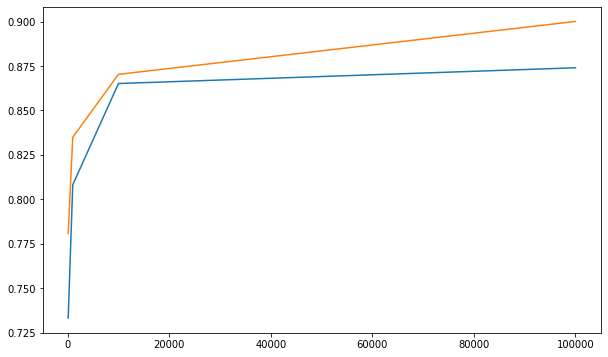

In [60]:
fig = plt.figure()

for frame in [results_lr, results_rf]:
    plt.plot(frame['sample_size'], frame['auc_mean'])

#plt.xlim(0,18000)
#plt.ylim(0,30)
plt.show()

# Experiments With All Algorithms

In [22]:
SAMPLE_SIZES = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Logistic Regression
print('Logistic Regression')
lr = LogisticRegression()
results_lr = sample_size_experiment(lr, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

# Decision Tree
print('Decision Tree')
dt = DecisionTreeClassifier()
results_dt = sample_size_experiment(dt, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

# Random Forest
print('Random Forest')
rf = RandomForestClassifier()
results_rf = sample_size_experiment(rf, X_train, y_train, X_valid, y_valid, SAMPLE_SIZES)

print('FINISHED!')

Logistic Regression
completed 10 rounds with 100 training examples
completed 10 rounds with 500 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 5000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 50000 training examples
completed 10 rounds with 100000 training examples
Decision Tree
completed 10 rounds with 100 training examples
completed 10 rounds with 500 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 5000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 50000 training examples
completed 10 rounds with 100000 training examples
Random Forest
completed 10 rounds with 100 training examples
completed 10 rounds with 500 training examples
completed 10 rounds with 1000 training examples
completed 10 rounds with 5000 training examples
completed 10 rounds with 10000 training examples
completed 10 rounds with 50000 traini

In [39]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams['figure.dpi'] = 330

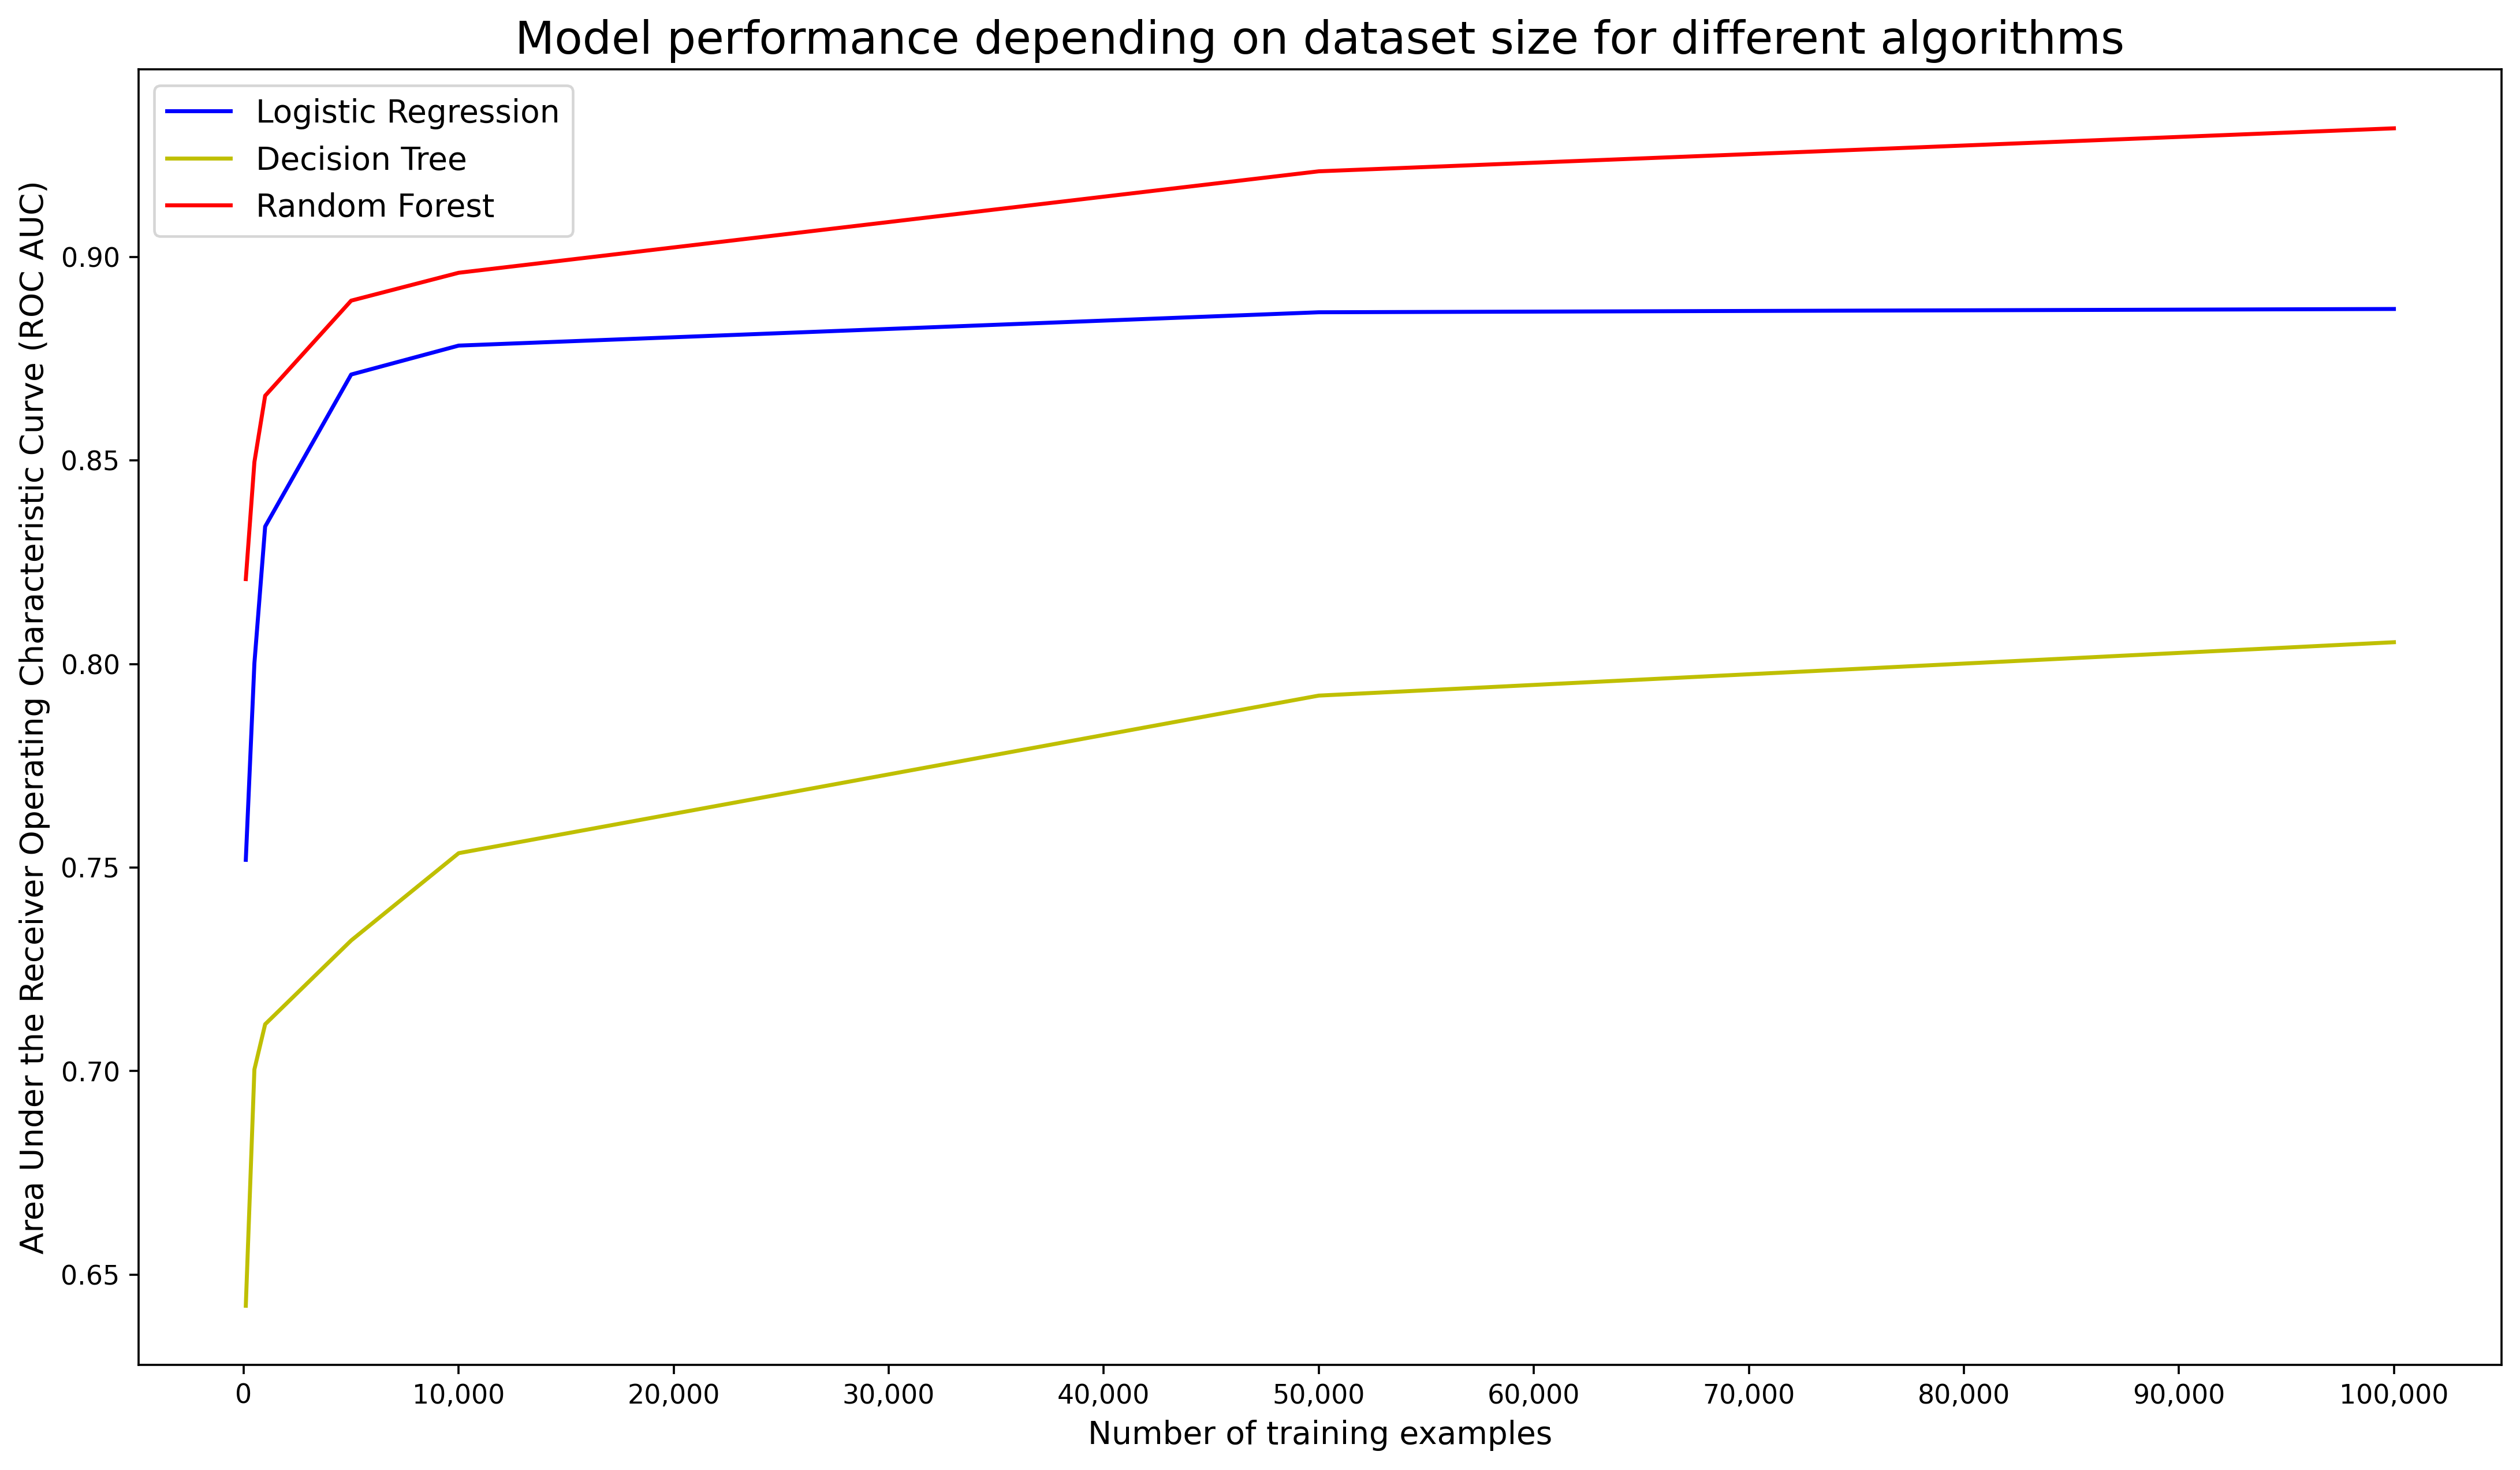

In [41]:
xticks = np.arange(0, 100001, step=10000)

fig, ax = plt.subplots()

ax.plot(results_lr[['sample_size']], results_lr[['auc_mean']], 'b-', label='Logistic Regression')
ax.plot(results_dt[['sample_size']], results_dt[['auc_mean']], 'y-', label='Decision Tree')
ax.plot(results_rf[['sample_size']], results_rf[['auc_mean']], 'r-', label='Random Forest')

leg = ax.legend(fontsize='large')
plt.title('Model performance depending on dataset size for different algorithms', fontsize='xx-large')
plt.ylabel('Area Under the Receiver Operating Characteristic Curve (ROC AUC)', fontsize='large')
plt.xlabel('Number of training examples', fontsize='large')
plt.xticks(xticks, labels=['{:,}'.format(t) for t in xticks])
plt.show()

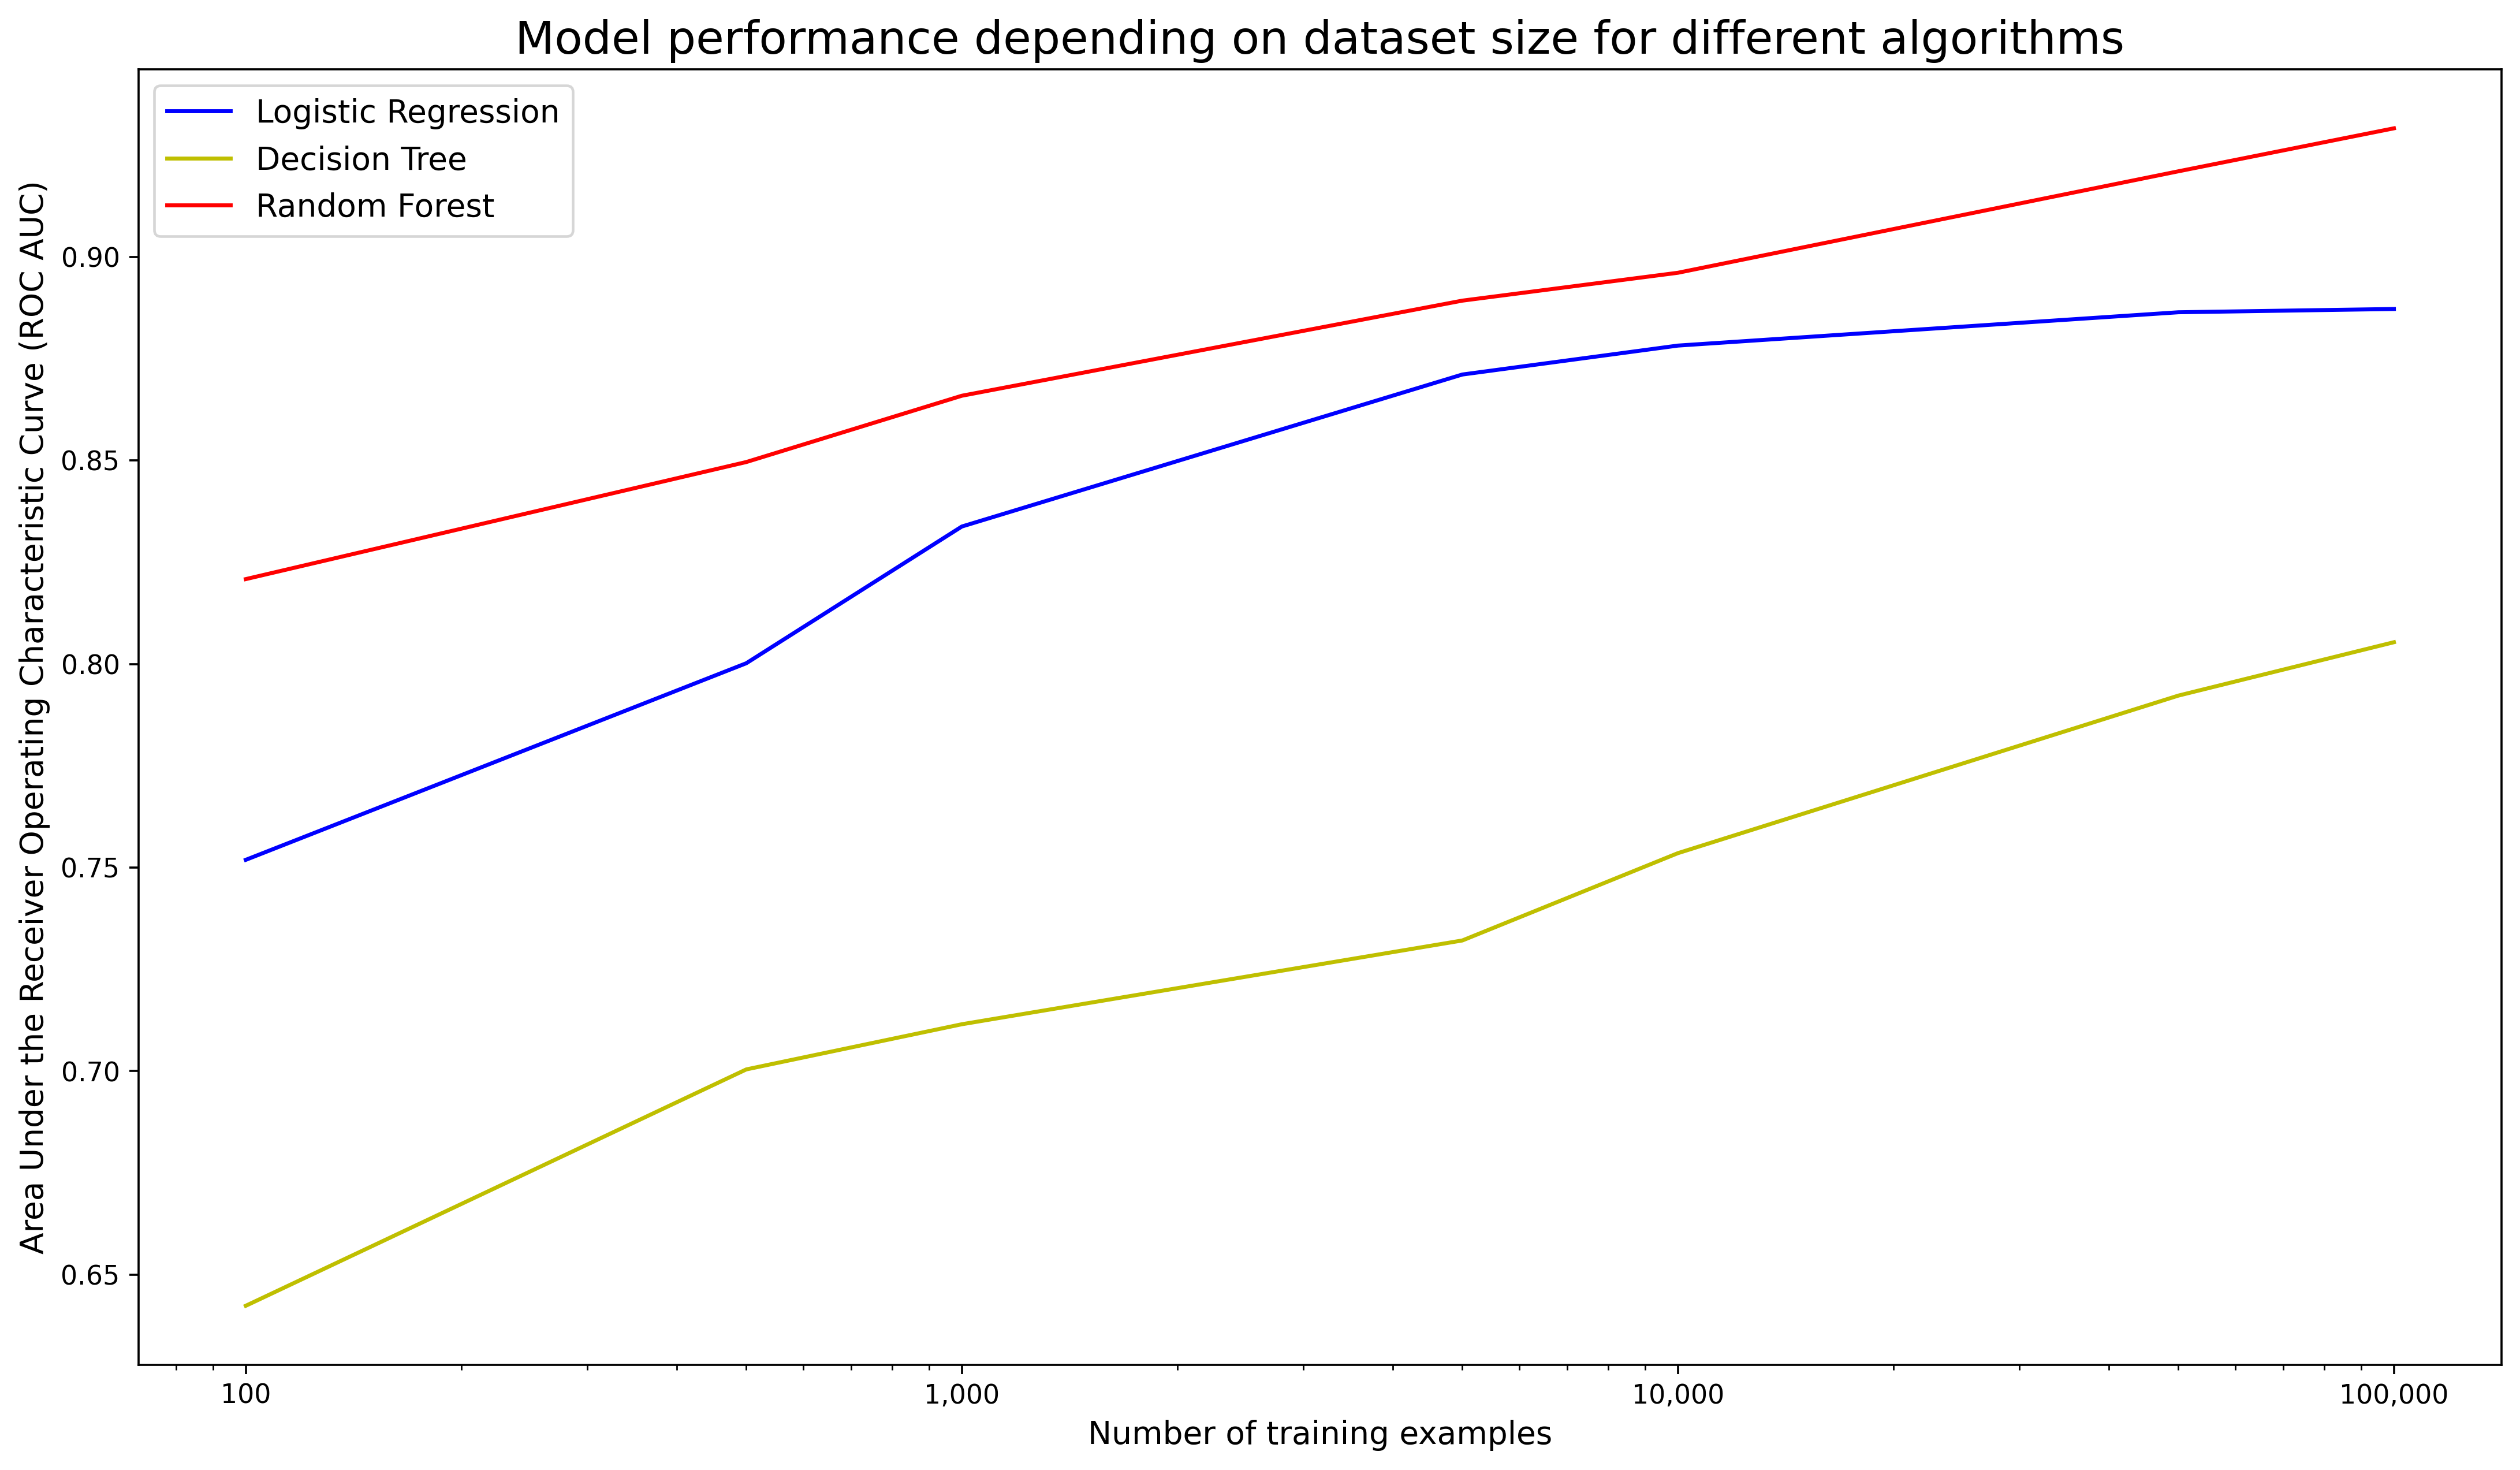

In [47]:
xticks = [100, 1000, 10000, 100000]
fig, ax = plt.subplots()

ax.plot(results_lr[['sample_size']], results_lr[['auc_mean']], 'b-', label='Logistic Regression')
ax.plot(results_dt[['sample_size']], results_dt[['auc_mean']], 'y-', label='Decision Tree')
ax.plot(results_rf[['sample_size']], results_rf[['auc_mean']], 'r-', label='Random Forest')

leg = ax.legend(fontsize='large')
ax.set_xscale('log')
plt.title('Model performance depending on dataset size for different algorithms', fontsize='xx-large')
plt.ylabel('Area Under the Receiver Operating Characteristic Curve (ROC AUC)', fontsize='large')
plt.xlabel('Number of training examples', fontsize='large')
plt.xticks(xticks, labels=['{:,}'.format(t) for t in xticks])
plt.show()

In [48]:
results_dt

,classifier,sample_size,auc_mean,auc_std
0,DecisionTreeClassifier,100,0.64,4.00e-02
1,DecisionTreeClassifier,500,0.70,1.49e-02
2,DecisionTreeClassifier,1000,0.71,1.61e-02
3,DecisionTreeClassifier,5000,0.73,1.04e-02
4,DecisionTreeClassifier,10000,0.75,8.46e-03
5,DecisionTreeClassifier,50000,0.79,6.33e-03
6,DecisionTreeClassifier,100000,0.81,8.10e-03


In [51]:
results_lr.append([results_dt, results_rf], ignore_index=True).to_csv("data_value_results.csv", index=False)